<a href="https://colab.research.google.com/github/SameedIrfan7/Deep-Learning-/blob/main/Dog_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# End-to-End multi class Dog breed Identification

## 1. Problem


## 2. Data
The data we're using is from kaggle's dog breed prediction


## 3. Evaluation


## 4. Features
Some information about the data:
we are dealing with images(unstructured data)

In [1]:
#!unzip "/content/drive/MyDrive/Deep Learning/dog-breed-identification.zip" -d "/content/drive/MyDrive/Deep Learning "
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 ## get our workspace to colab
 * Import tensorflow
 * Import tensorflow hub
 * Make sure we're using a GPU

In [2]:
#import tensorflow to colab
#import neccessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF version", tf.__version__)
print("TF HUb Version", hub.__version__)

#Check for GPU availability
print("GPU", "available (yesssss!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version 2.15.0
TF HUb Version 0.16.1
GPU not available :(


In [3]:
import pandas as pd
label_dt=pd.read_csv("/content/drive/MyDrive/Deep Learning-Datasets/labels.csv");
print(label_dt.describe())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126


In [4]:
print(label_dt.head())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


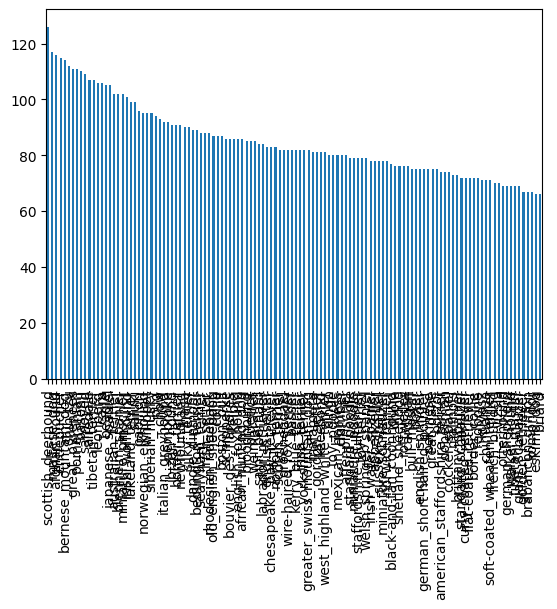

In [5]:
label_dt["breed"].value_counts().plot(kind="bar");

In [6]:
label_dt["breed"].value_counts().median()

82.0

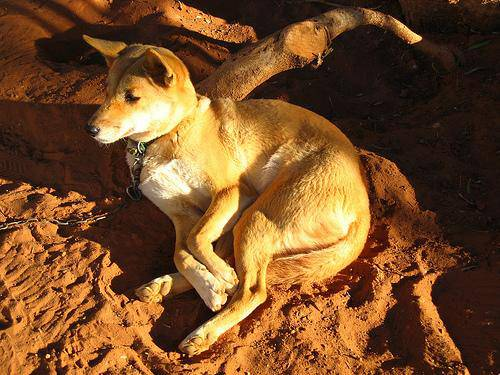

In [7]:
from IPython.display import Image
doggie=Image("drive/MyDrive/Deep Learning-Datasets/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg");
display(doggie);

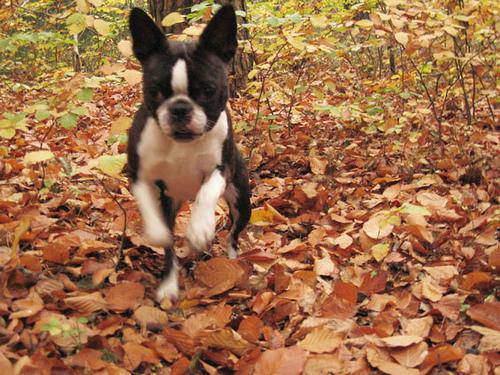

In [8]:
from IPython.display import Image, display

# Specify the path to your image file
image_path = "drive/MyDrive/Deep Learning-Datasets/train/000bec180eb18c7604dcecc8fe0dba07.jpg"

# Display the image
display(Image(filename=image_path))


### GEtting images and their labels

In [9]:
label_dt.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [10]:
# create path name from image id's
filenames = ["drive/My Drive/Deep Learning-Datasets/train/" + fname + ".jpg " for fname in label_dt['id']]

In [11]:


len(filenames)

10222

In [12]:
# check weither number of filenames matches number of actual image files
import os
if len(os.listdir("drive/My Drive/Deep Learning-Datasets/train/"))==len(filenames):
  print("filenames match with actual amount of files");
else:
  print("Check the directory")

Check the directory


In [13]:
len(os.listdir("drive/My Drive/Deep Learning-Datasets/train/"))

3405

In [14]:
import os

# Directory containing the image files
directory = "drive/My Drive/Deep Learning-Datasets/train/"

# Generate list of filenames
filenames = ["drive/My Drive/Deep Learning-Datasets/train/" + fname + ".jpg" for fname in label_dt['id']]

# Check if all files exist in the directory
missing_files = [fname for fname in filenames if not os.path.exists(fname)]

if len(missing_files) == 0:
    print("All filenames match with actual files in the directory.")
else:
    print("The following files are missing:")
    for file in missing_files:
        print(file)

# Compare the number of files in the directory with the number of filenames
print("Number of files in directory:", len(os.listdir(directory)))
print("Number of filenames:", len(filenames))


Streaming output truncated to the last 5000 lines.
drive/My Drive/Deep Learning-Datasets/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg
drive/My Drive/Deep Learning-Datasets/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg
drive/My Drive/Deep Learning-Datasets/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg
drive/My Drive/Deep Learning-Datasets/train/83d405858f0931722ef21e8ac0adee4d.jpg
drive/My Drive/Deep Learning-Datasets/train/83d4125a4c3c7dc5956563276cb1cd74.jpg
drive/My Drive/Deep Learning-Datasets/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg
drive/My Drive/Deep Learning-Datasets/train/83fad0718581a696132c96c166472627.jpg
drive/My Drive/Deep Learning-Datasets/train/83fbbcc9a612e3f712b1ba199da61f20.jpg
drive/My Drive/Deep Learning-Datasets/train/8403d8936430c2f05ab7d74d23c2c0cb.jpg
drive/My Drive/Deep Learning-Datasets/train/8406d837b2d7fac1c3cd621abb4c4f9e.jpg
drive/My Drive/Deep Learning-Datasets/train/840b67d26e5e43f8eb6430f62d4ba1ac.jpg
drive/My Drive/Deep Learning-Datasets/train/840db91ba46001

In [15]:
label_dt.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [16]:
import numpy as np
labels=label_dt["breed"].to_numpy()
# labels =np.array(labels)
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [17]:
len(labels)

10222

In [18]:
if len(labels) == len(filenames):
  print("Number of file name matches nor of filenames")
else:
  print("Number of labels doesnt mathces nor of iflenames, check data dircotires")

Number of file name matches nor of filenames


In [19]:
#find the unique value in given array in numpy
unique_breeds=np.unique(labels)
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [20]:
len(unique_breeds)

120

In [21]:

#turn a single label into an array of booleans
print(labels[0])
labels[0]==unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [22]:
# turn every label into a boolean array
boolean_labels=[label ==unique_breeds for label in labels]
boolean_labels

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [23]:
len(boolean_labels)

10222

In [24]:
#Example turning boolean array into integers
print(labels[0]) #original label
print(np.where(unique_breeds ==labels[0])) #index where label occurs
print(boolean_labels[0].argmax()) #index where label occurs in boolean array
print(boolean_labels[0].astype(int)) #there will be a 1 where the sample label occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our won validation set

In [25]:
# Setup x and y var
x = filenames
y = boolean_labels

In [26]:
print(len(x))
print(len(y))

10222
10222


We're going to start wd less dataset with ~100 images and increase as needed

In [27]:
# Set num of images to use for experimenting
NUM_IMG = 1000 #@param {type: "slider", min:1000, max:10000, step:100}

In [28]:
NUM_IMG

1000

In [29]:
#Lets train and split into train and validation
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val=train_test_split(x[:NUM_IMG],
                                                 y[:NUM_IMG],
                                                 test_size=0.2,
                                                 random_state=42)
len(x_train), len(y_train), len(x_val), len(y_val)

(800, 800, 200, 200)

In [30]:
x_train[:5], y_train[:2]

(['drive/My Drive/Deep Learning-Datasets/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/My Drive/Deep Learning-Datasets/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/My Drive/Deep Learning-Datasets/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/My Drive/Deep Learning-Datasets/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/My Drive/Deep Learning-Datasets/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, 

# Preprocessing-Turning images into tensor

we will create a func
1. take an img file path
2. use tensorflow to read and save in some `var`
3. Turn .jpg or .png file to tensors
4. Resize the `var` (which means image) in shape of (224, 224)
5. Return the modified `var`


In [31]:
#convert img to numpy array
from matplotlib.pyplot import imread
image = imread(filenames[100])
image.shape

(500, 500, 3)

array([[[  1,   0,   0],
        [ 26,  25,  23],
        [  1,   0,   0],
        ...,
        [  0,   0,   0],
        [ 10,  10,   8],
        [  7,   7,   5]],

       [[  1,   0,   0],
        [ 11,  10,   8],
        [ 15,  14,  12],
        ...,
        [ 15,  15,  13],
        [  0,   0,   0],
        [  9,   9,   7]],

       [[  1,   0,   0],
        [ 29,  28,  26],
        [166, 165, 163],
        ...,
        [158, 158, 156],
        [ 11,  11,   9],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   5],
        [  7,   6,  12],
        [135, 134, 140],
        ...,
        [ 18,  18,  18],
        [  4,   4,   4],
        [  0,   0,   0]],

       [[ 15,  14,  20],
        [  1,   0,   6],
        [ 21,  20,  26],
        ...,
        [  3,   3,   3],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   5],
        [  2,   1,   7],
        [  0,   0,   5],
        ...,
        [  0,   0,   0],
        [  2,   2,   2],
        [  4,   4,   4]]], dtype=uint8)
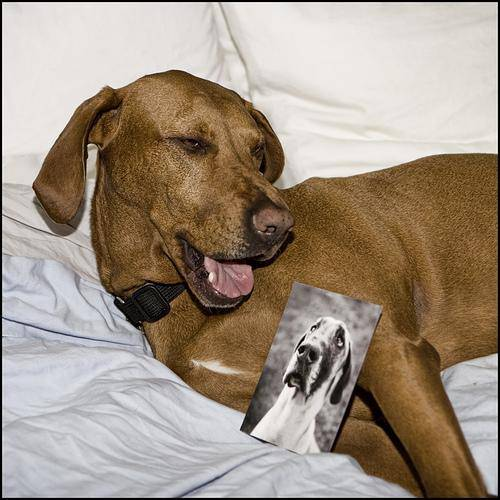

In [32]:
image

In [33]:
image[:2] #my cpu is working

array([[[ 1,  0,  0],
        [26, 25, 23],
        [ 1,  0,  0],
        ...,
        [ 0,  0,  0],
        [10, 10,  8],
        [ 7,  7,  5]],

       [[ 1,  0,  0],
        [11, 10,  8],
        [15, 14, 12],
        ...,
        [15, 15, 13],
        [ 0,  0,  0],
        [ 9,  9,  7]]], dtype=uint8)

In [34]:
# turn images into tensor
tf.constant(image)[:2]  # GPU is working

<tf.Tensor: shape=(2, 500, 3), dtype=uint8, numpy=
array([[[ 1,  0,  0],
        [26, 25, 23],
        [ 1,  0,  0],
        ...,
        [ 0,  0,  0],
        [10, 10,  8],
        [ 7,  7,  5]],

       [[ 1,  0,  0],
        [11, 10,  8],
        [15, 14, 12],
        ...,
        [15, 15, 13],
        [ 0,  0,  0],
        [ 9,  9,  7]]], dtype=uint8)>

### Now we'hve to create a func
we will create a func
1. take an img file path
2. use tensorflow to read and save in some `var`
3. Turn .jpg or .png file to tensors
4. Resize the `var` (which means image) in shape of (224, 224)
5. Return the modified `var`

In [35]:
# img size
IMG_SIZE=224

#craete a func for processing images
def process_images(image_path):

  #loading images
  image = tf.io.read_file(image_path)

  # turn the jpeg img into numerical tensor with 3 color channels (R: G :B)
  image=tf.image.decode_jpeg(image, channels=3)

  # convert the color channel values from 0-255 to 0-1 values
  image=tf.image.convert_image_dtype(image, tf.float32)

  #resize the image to our needs (224, 224)
  image=tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])

  return image

# Turning images or data into batches
Why turn our data into batches?
- Lets say i'm trying to process 10000+ images in one go......... they all might not fit into memory.
- So we divide images to batches which is of 32 and tuple of tensors `(image:label)`

In [36]:
#create a simple func to returna tuple(image, label)
def get_image_label(image_path, label):
  image =process_images(image_path)
  return image, label

Now we've got a way to turn data into tuple of tensors in the form: `(image, label)`, lets make a function to turn all of our data into `(x & y)` into batches


In [37]:
# batch size 32
BATCH_SIZE=32

# create a func to turn our data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  # if the data is test datset, we probably dont have labels
  if test_data:
    print("Creating test data batches")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x))) #only file path no labels
    data_batch = data.map(process_images).batch(BATCH_SIZE)
    return data_batch

  #if the data is a valid datset, we dont need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    data_batch= data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("creating training data batches....")
    #turning into tensors
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x), tf.constant(y)))
    #shuffling pathnames and labels bfr img processor func is faster
    data=data.shuffle(buffer_size=len(x))

    data=data.map(get_image_label)
    #turn the training data into batches
    data_batch =data.batch(BATCH_SIZE)

  return data_batch

In [38]:
# creating a trainig an dvalidation batches
train_data=create_data_batches(x_train, y_train)
val_data=create_data_batches(x_val, y_val, valid_data=True)

creating training data batches....
Creating validation data batches...


In [39]:
#check out the diff attributes of our data
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [40]:
y[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

## Visualizing data

In [41]:
import matplotlib.pyplot as plt

#create a func for viewing images in a data batch
def show_25_images(images, labels):
  #setup figures
  plt.figure(figsize=(10, 10))

  #loop through 25
  for i in range(25):
    ax =plt.subplot(5, 5, i+1)
    #display an image
    plt.imshow(images[i]);

    #add the image label as the title
    plt.title(unique_breeds[labels[i].argmax()])

    #turn the grid lines off
    #plt.axis("off")

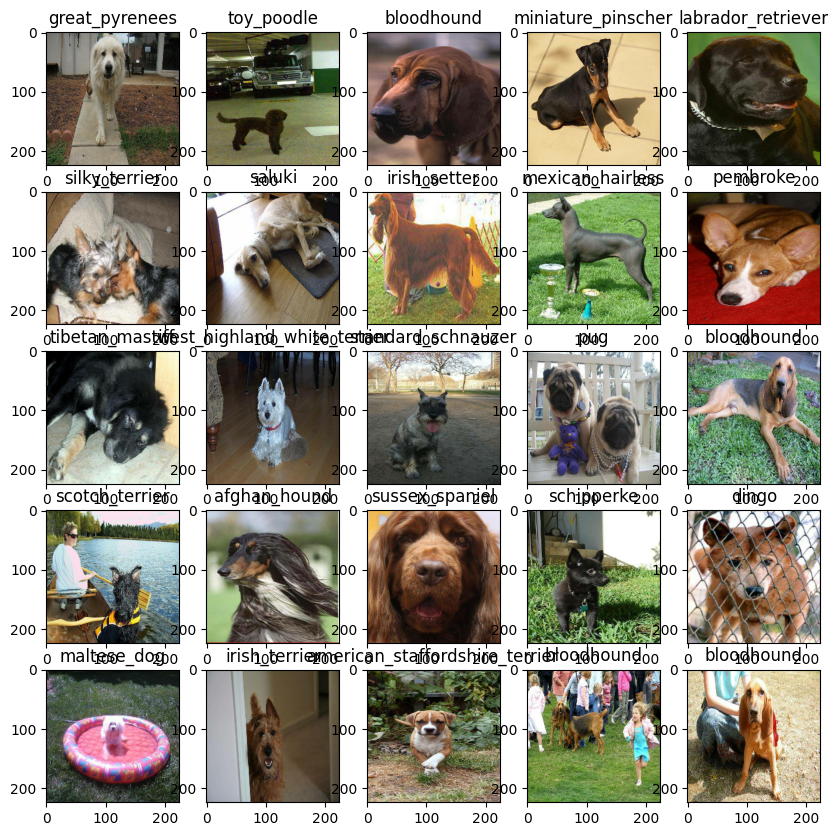

In [42]:
train_images, train_labels= next(train_data.as_numpy_iterator())
# now lets visualize the data in a trainig batch
show_25_images(train_images, train_labels)

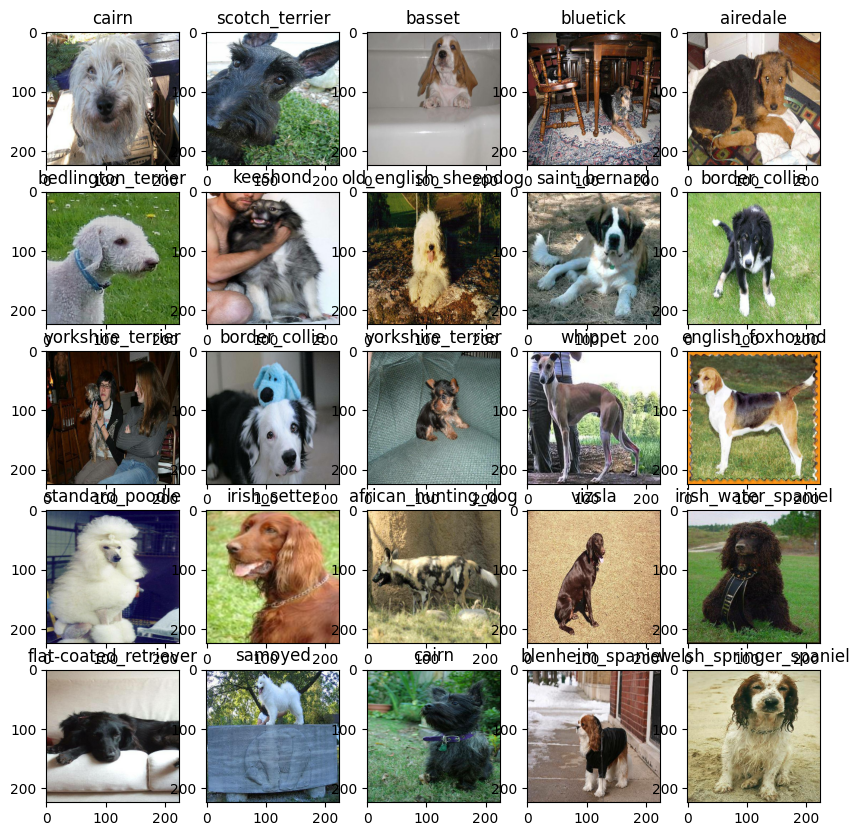

In [43]:
### now lets visualize our validation dataset
val_images, val_labels=next(val_data.as_numpy_iterator())
show_25_images(val_images, val_labels)

## Building a model
1. The inout shape
2. The output shape
3. The URL model

In [44]:
#setup input shape
INPUT_SHAPE=[None, IMG_SIZE, IMG_SIZE, 3]

#setup output shape
OUTPUT_SHAPE=len(unique_breeds)

# setup model URL from tensorflow hub
MODEL_URL ="https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2"

Now we've got all input, output and models, we are good to go

Knwoing this, lets create a function which:
* Defines the layers in a keras model in sequential fashion
* Compiles the model
* Build the model

In [45]:
import tensorflow as tf
import tensorflow_hub as hub

def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    print("Building the model with:", model_url)

    # Setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(model_url),  # Layer-1 (input layer)
        tf.keras.layers.Dense(units=output_shape, activation='softmax')
    ])

    # Compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

    # Build the model
    model.build(input_shape)

    return model

In [46]:
model=create_model()
model.summary()

Building the model with: https://www.kaggle.com/models/google/mobilenet-v2/frameworks/TensorFlow2/variations/130-224-classification/versions/2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5552953 (21.18 MB)
Trainable params: 120240 (469.69 KB)
Non-trainable params: 5432713 (20.72 MB)
_________________________________________________________________


# creating callbacks

callbacks are helper funcs a model can use during training to do such things as save its progress, check its progress or stop training early if a model stops improving.

we'll create 2 callbacks, one for Tensorflow which helps our model progress and another for early stopping which prevents our model from training for too long

### TensorBoard Callback

3-stpes to setup
1. load the tensorboard
2. Create a tensorboard callback
3. Visualize our models training logs wiht the `%tensorboard` magic func

In [47]:
# Load Tensorboard notebook extension
%load_ext tensorboard

In [48]:
import datetime

# create a function to build a tensorboard callback
def create_tensorboard_callback():
  #create a log directory for storing Tensoboard logs
  logdir=os.path.join("/content/drive/MyDrive/Deep Learning-Datasets/logs",
                      datetime.datetime.now().strftime("%Y%m%d-%HM%S"))
  return tf.keras.callbacks.TensorBaord(logdir)

In [ ]:
# craete early stopping callbacks
early_stopping = tf.keras.callbacks.earlyStopping(monitor="val_accuracy",
                                                  patience=3)